$$
\begin{align*}
\text{minimize} ~~ & ~~
\sum_{i \in N} \left( \varepsilon_i^\mathrm{L} + \varepsilon_i^\mathrm{U} \right),
\\ \text{subject to} ~~ & ~~
\ln a_{ij}^\mathrm{L+} + \ln w_j^\mathrm{U} - \varepsilon_i^\mathrm{L} \leq \ln w_i^\mathrm{L} \leq \ln a_{ij}^\mathrm{L-} + \ln w_j^\mathrm{U} + \varepsilon_i^\mathrm{L}, &&
i, j \in N, ~~ i \neq j, \\ & ~~
\ln a_{ij}^\mathrm{U-} + \ln w_j^\mathrm{L} - \varepsilon_i^\mathrm{U} \leq \ln w_i^\mathrm{U} \leq \ln a_{ij}^\mathrm{U+} + \ln w_j^\mathrm{L} + \varepsilon_i^\mathrm{U}, &&
i, j \in N, ~~ i \neq j, \\ & ~~
\varepsilon_i^\mathrm{L} \geq \ln w_i^\mathrm{L+} - \ln w_i^\mathrm{L-}, ~~
\varepsilon_i^\mathrm{U} \geq \ln w_i^\mathrm{U-} - \ln w_i^\mathrm{U+}, &&
i \in N, \\ & ~~
w_i^\mathrm{L-} \leq a_{ij}^\mathrm{L-} w_j^\mathrm{U} , ~~
w_i^\mathrm{U-} \geq a_{ij}^\mathrm{U-} w_j^\mathrm{L}, &&
i, j \in N, ~~ i \neq j, \\ & ~~
w_i^\mathrm{L+} \geq a_{ij}^\mathrm{L+} w_j^\mathrm{U}, ~~
w_i^\mathrm{U+} \leq a_{ij}^\mathrm{U+} w_j^\mathrm{L}, &&
i, j \in N, ~~ i \neq j, \\ & ~~
\sum_{j \in N \backslash \{i\}} \left( w_j^\mathrm{U} \right) + w_i^\mathrm{L} \geq 1, ~~
\sum_{j \in N \backslash \{i\}} \left( w_j^\mathrm{L} \right) + w_i^\mathrm{U} \leq 1, &&
i \in N, \\ & ~~
\sum_{i \in N} \left( w_i^\mathrm{L} + w_i^\mathrm{U} \right) = 1,
\\ & ~~
w_i^\mathrm{U} \geq w_i^\mathrm{L} \geq \epsilon, ~~
w_i^\mathrm{L-}, w_i^\mathrm{U-}, w_i^\mathrm{L+}, w_i^\mathrm{U+} \geq \epsilon, ~~
\varepsilon_i^\mathrm{L}, \varepsilon_i^\mathrm{U} \geq 0, &&
i \in N. 
\end{align*}
$$

In [31]:
using IntervalArithmetic
using LaTeXStrings
using Latexify
using Statistics
using Plots
pyplot()

include("./logarithmic.jl")
include("./solution.jl")
include("./utils.jl")
include("./density_heatmap.jl")

include("../intervalPCM/index.jl")
include("../twofoldInterval/index.jl")
include("../twofoldIntervalPCM/index.jl")
include("../simulation.jl")

total (generic function with 1 method)

In [32]:
n = 5; simNum = 10000
print()

In [33]:
twofoldIntervalPCMs = map(
    case -> intervalPCM2TwofoldIntervalPCM(case.A₁, case.A₂),
    generateSimulationCases(n, simNum, 1))
crispPCMs = map(
    A -> twofoldIntervalPCM2CrispPCM(A),
    twofoldIntervalPCMs)
print()

In [34]:
rowGMs = map(
    matrices -> map(i -> geometric_mean(matrices.Āᶜ[i,:]), 1:n),
    crispPCMs
)
rowGMs = map(k -> map(i -> rowGMs[k][i] / sum(rowGMs[k]), 1:n), 1:simNum)
print()

In [35]:
solutions = map(
    A -> solveLogarithmic(A),
    twofoldIntervalPCMs
)
print()

In [36]:
GM = reduce(vcat, map(k -> map(i -> rowGMs[k][i], 1:n), 1:simNum))
ε = reduce(vcat, map(k -> map(i -> solutions[k].εᴸ[i] + solutions[k].εᵁ[i], 1:n), 1:simNum))
print()

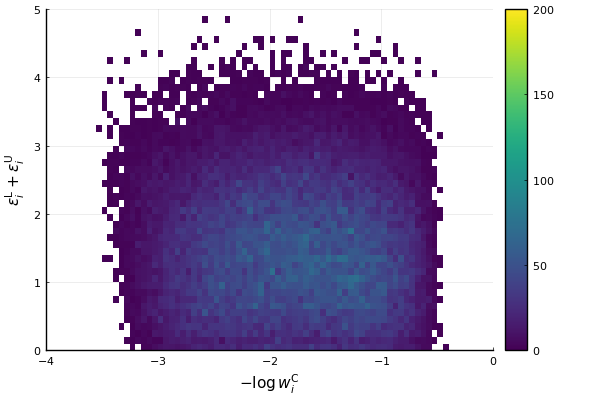

In [53]:
density_heatmap(log.(GM), ε,
    xlabel=L"- \log w_i^\mathrm{C}",
    ylabel=L"\varepsilon_i^\mathrm{L} + \varepsilon_i^\mathrm{U}",
    xbinsize=0.04,
    ybinsize=0.055,
    clims=(0.0, 200.0),
    xlims=(-4.0, 0.0),
    ylims=(0.0, 5.0),
    )

In [38]:
cor(GM, ε)

-0.046407873189382644